### 목표 : 선형회귀 -> 곡선 회귀 (다항 회귀)
- 특성공학 -> 피처 추출/선택/생성
- 비선형의 데이터에 대한 피처 생성 => 곡선 형태의 회귀선 수식
- 모듈 : sklearn.preprocessing 내에 포함
- Data : fish.csv
- feature : Perch Height, Length, Width
- target : Weight
- 학습 유형 : 지도학습

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split


1. 전처리 피처 조합 생성 살펴보기

In [58]:
# 인스턴스 생성
poly = PolynomialFeatures()
# degree : 차원 설정
# order : 메모리에 저장되는 순서
# include_bias = False -> 1 빼기

poly.fit([[2,3]])

PolynomialFeatures()

In [59]:
poly.transform([[2,3]])

array([[1., 2., 3., 4., 6., 9.]])

In [60]:
poly.get_feature_names_out() # 피쳐 이름

array(['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2'], dtype=object)

2. Perch 데이터를 최대한 만족하는 회귀선 찾기

In [61]:
# 1. 데이터 준비
dataDF = pd.read_csv('../DATA/fish.csv', usecols=[0,1,2,4,5])
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length   159 non-null    float64
 3   Height   159 non-null    float64
 4   Width    159 non-null    float64
dtypes: float64(4), object(1)
memory usage: 6.3+ KB


In [62]:
# perch만 추출
perchDF = dataDF[dataDF['Species']=='Perch']
perchDF.reset_index(drop=True, inplace=True)
perchDF.head(), perchDF.tail()

(  Species  Weight  Length  Height   Width
 0   Perch     5.9     8.4  2.1120  1.4080
 1   Perch    32.0    13.7  3.5280  1.9992
 2   Perch    40.0    15.0  3.8240  2.4320
 3   Perch    51.5    16.2  4.5924  2.6316
 4   Perch    70.0    17.4  4.5880  2.9415,
    Species  Weight  Length   Height   Width
 51   Perch  1100.0    42.0  12.8002  6.8684
 52   Perch  1000.0    43.0  11.9328  7.2772
 53   Perch  1100.0    43.0  12.5125  7.4165
 54   Perch  1000.0    43.5  12.6040  8.1420
 55   Perch  1000.0    44.0  12.4888  7.5958)

In [63]:
# 2. 데이터 확인
# - 학습 유형 결정을 위한 단계
# - 피처 스케일링 진행 여부 체크

# 2-1. 중복값, 결측치, 이상치 확인
# 1) 결측치 확인
perchDF.isnull().sum()  # 모두 0
# 2) 중복값 확인
perchDF.duplicated().sum()  # 0

0

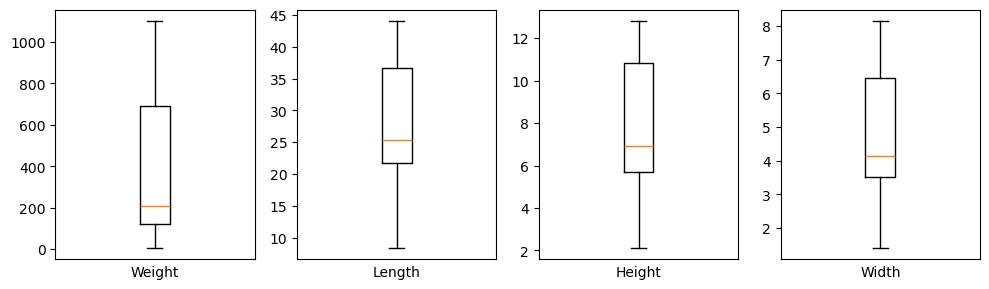

In [67]:
# 3) 이상치 확인
plt.figure(figsize=(10,3))
for col in range(1, len(perchDF.columns)):
    plt.subplot(1,4,col)
    plt.boxplot(perchDF.iloc[:,col])
    plt.xticks([])
    plt.xlabel(perchDF.columns[col])
plt.tight_layout()
plt.show()  # 이상치가 보이진 않음

In [75]:
# 3. 스케일링
# : 네 피처의 값의 범위가 크게 차이나므로 정규화 진행
#   스케일러의 종류 : StandardScaler, MinMaxScaler, RobustScaler
# - 어떤 스케일러가 좋을지 판단하기

# 1) feature 와 target 구분
featureDF = perchDF.iloc[:,1:]
targetSR = perchDF.iloc[:,0]

# 2) train, test 분리
X_train, X_test, y_train, y_test = train_test_split(featureDF, targetSR, test_size=0.3, random_state=123)

In [76]:
for scaler in [StandardScaler(), MinMaxScaler(), RobustScaler()]:
    scaler.fit(X_train)
    df = scaler.transform(X_train)
    print(df.shape, df.mean(), df.std())

(39, 4) -8.540177112501205e-18 1.0000000000000002
(39, 4) 0.4468408703337931 0.30975274507827777
(39, 4) 0.1816260634356117 0.5879633155993566
